<h1> Support Vector Machines </h1> 

O SVM é um poderoso e versátil modelo de aprendizado de máquina, capaz de executar classificação linear e não-linear, regressão e até detecção de outliers. SVMs são particularmente adequados para classificação de datasets complexos, mas de tamanhos pequenos ou médios.  

<h2> Classificação Linear com SVM </h2>

A ideia fundamental do SVM é melhor explicado com algumas imagens. A figura abaixo mostra parte do dataset iris, com duas classes que são claramente linearmente separáveis.

A imagem da esquerda mostram três possíveis classificadores lineares, dois classificadores conseguiram separar as classes corretamente, porém com indicios de que não funcionarão bem para novos exemplos.

A imagem da direita ja mostra a fronteira de decisão do SVM, em que as duas classes não estão só separadas mas também na maior distância possível das amostras de treino mais próximas.

<img src="imagens/largemargin.png"> </img>

Você pode pensar em um classificador SVM como a rua mais ampla possível (representada pelas linhas tracejadas paralelas) entre as classes. Isso é chamado de _classificador_ _de_ _margem_ _larga_.

Perceba que adicionando mais instâncias de treinamento "fora das ruas" não irão afetar as fronteiras de decisão, elas são determinadas (ou "suportadas") pelas instâncias localizadas nas fronteiras das "ruas". Essas instâncias são chamadas de _support_ _vectors_ (e estão circuladas na Figura 5-1).

__----------------------------------------------------------------------------------------------------------------------------__

É importante saber que os modelos SVM são sensíveis a escala diferentes entre as features. como pode ser visto na Figura 5-2: na figura da esquerda, a escala vertical é mais larga do que a horizontal, então a fronteira de decisão fica muito próxima dos _support_ _vectors_, ja a superficie da direita usando escalonamento das features, parece muito melhor. 

<img src="imagens/featurescaling.png"> </img>

<h3> Classificação com margem curta </h3>

Se for imposto que todas as instâncias devem ficar "fora das ruas", isso é chamado de _hard_ _margin_ _classification_. Existem dois problemas principais com esse tipo de abordagem. 

A primeira que ele só funciona se as classes forem linearmente separáveis.

A segunda que ele é bastante sensível a _outliers_.

Na Figura 5-3 mostra a parte do iris dataset com a adição de um outlier na imagem esquerda, sendo impossível de achar um _hard_ _margin_, e na imagem da direita a superficie de decisão fica muito diferente da vizualisada anteriormente na Figura 5-1 sem o _outlier_, e provavelmente não generalizar tão bem.

<img src="imagens/hardmargin.png"> </img>

Para evitar esses problemas é preferível usar um modelo mais flexível. O objetivo é encontrar um bom balanceamento entre manter a margem mais larga possível e limitando sua violação (instâncias que acabam no meio da "rua" ou até do lado errado). Isso é chamado de _soft_ _margin_ _classification_. 

Você pode controlar esse balanceamento usando o hyperparametro __c__: um pequeno valor de __c__ leva a uma "rua" maior e mais violações da margem. Na Figura 5-4 mostra a fronteira de decisão e as margens de dois classificadores SVM _soft_ _margin_ em um datatset não separável linearmente. Na esquerda, usando um __c__ alto, o classificador faz pequenas violações da margem, mas termina com um margem pequena. Na direita, usando um __c__ baixo, a margem é muito mais larga, mas muitas instâncias acabam dentro da "rua".

De qualquer forma, parece que o segundo classificador irá generalizar melhor, pois a maioria das violações de margem ainda estão localizados no lado correto da decisão.

<img src="imagens/hyperc.png"> </img>

DICA: Caso esteja ocorrendo _overfitting_ no seu modelo, você pode tentar regularizar reduzindo o __c__.

O seguinte código carrega o dataset iris, faz escala das features e treina o modelo SVM com __c__ = 0.1 e com função _hinger_ _loss_

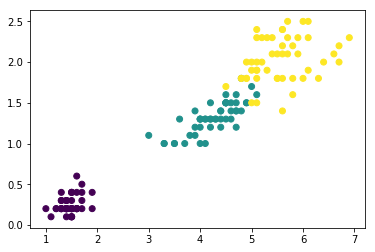

In [26]:
#Importa as bibliotecas do Scikit-Learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

#Carrega o dataset iris e separa duas features
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

#Plota o dataset
fig,ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
plt.show()

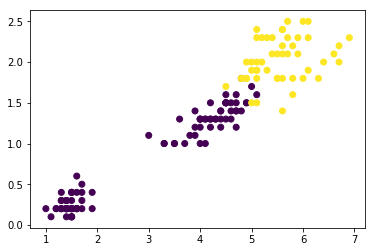

In [27]:
#Cria label para as Iris-Virginica(True) e as que não são (False)
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica#Plota o dataset

fig,ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
plt.show()

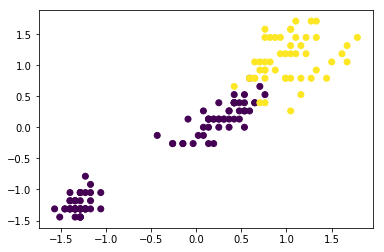

In [28]:
#Coloca as features em mesma escala e plota os dados
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig,ax = plt.subplots()
ax.scatter(X_scaled[:,0], X_scaled[:,1], c=y)
plt.show()

In [29]:
#Cria o modelo SVM linear com c=1 
clf = LinearSVC(C=1, loss="hinge")
clf.fit(X_scaled, y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

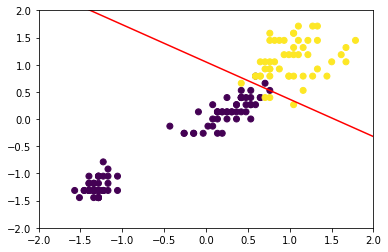

In [30]:
#Faz o plot da fronteira de decisão
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

fig,ax = plt.subplots()
ax.scatter(X_scaled[:,0], X_scaled[:,1], c=y)
plt.plot(xx, yy, 'r-')
axes = plt.gca()
axes.set_ylim([-2,2])
axes.set_xlim([-2,2])
plt.show()

In [31]:
#Faz predição dos dados
clf.predict([[0.5, 0.5]])

array([0.])

Diferentemente da regressão logística, o classificadores SVM não geram probabilidades para cada classe.

Alternativamente, poderia ser usado classe SVC, usando SVC(kernel="linear", C=1), mas é muito lento, não recomendado para datasets com amostras acima de 10000, sua complexidade é acima da quadrática.

Outra opção é usar classe _SGDClassifier_ com _SGDClassifier(loss="hinge", alpha=1/(m*C))_. Que aplica gradiente stocástico para treinar SVM linear, não converge tão rápido quanto LinearSVC, mas pode usar útil para lidar com enormes conjuntos de dados que não cabem em memória, ou para tarefas de classificação online.

DICA: A classe _LinearSVC_ regulariza o termo de bias, então você deve primeiramente subtrair a média do dataset, isso é automático se for utilizado _StandardScaler_, além do mais tenha certeza de setar o hyperparametro _loss_ para "hinge", pois não é valor default. Para uma melhor performance você deve colocar o hyperparametro _dual_ para False, ao menos que você tenha mais features do que amostras de treino.

__----------------------------------------------------------------------------------------------------------------------------__

<h2> Classificação não Linear com SVM </h2>

Para datasets não linearmente separáveis, uma alternativa é adicionar mais features com transformações polinomiais.

Na Figura 5-5 é representado um dataset com apenas uma feature $x_1$. Este dataset não é linearmente separável, mas se for adicionado uma segunda feature $x_2 = (x_1)^2$, o resultado em 2D é perfeitamente separável.

<img src="imagens/polyfeat.png"> </img>

In [32]:
#Importa as bibliotecas do Scikit
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#Monta o pipeline
poly_feat = PolynomialFeatures(degree=3)
stand_scale = StandardScaler()
clf = LinearSVC(C=10, loss="hinge")
polynomial_svm_clf = Pipeline((("poly_features",poly_feat),("scaler", stand_scale),("svm_clf",clf )))

#Treina o modelo
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

Superficie de decisão com modelo polinomial.

<img src="imagens/polyfeat2.png"> </img>

<h3> Kernel Polinomial </h3>

Adicionar features polinomial é simples de implementar e funciona e pode funcionar bem com todos os tipos de algoritmos de aprendizado de máquina, mas com um polinomio de grau muito baixo pode não trabalhar bem com datasets complexos e com alto grau polinomial pode criar um enorme número de features, fazendo o modelo ficar muito lento.

Quando se está usando SVM, você pode aplicar um técnica matemática chamado _kernel_ _trick_ sendo possível de chegar ao mesmo resultado de adicionar muitas features polinomiais, mesmo com polinomios de grau muito alto, sem realmente ter que adicioná-lo. Não havendo uma explosão do número de features. 

In [33]:
#Solução com Scikit para implementar kernel polinomial
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))))
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Esse código treina um classificador SVM usando kernel polinomial de grau 3, como mostrado na esquerda da Figura 5-7, na direita é outro classificador SVM usando grau 10.

Se o seu modelo tiver havendo overfitting você pode reduzir o grau do polinômio, caso haja underfitting você pode aumentar o grau. O hyperparámetro _coef0_ controla o quanto o modelo é influenciado por polinomios de grau alto contra os polinomios de grau baixo.

<img src="imagens/kernelpoly.png"> </img>

DICA: Uma abordagem comum para achar os melhores hyperparametros é usar grid search. É frenquentemente rápido de primeiro fazer uma buscar esparsa e depois fazer uma busca refinada em torno dos melhores valores encontrados. Tendo um bom senso de o que cada hyperparametro representa no modelo, você pode procurar em conjunto menor e mais correto.

<h3> Adicionando features de similaridade </h3>

Outra técnica para mapear problemas não lineares é adicionar features computadas  através de uma função de similaridade, que mede o quanto distante cada instância está de um marcador.

Exemplo: vamos pegar o dataset unidimensional definido anteriormente e adicionar dois marcadores em $x_1=-2$ e $x_1=1$ (mostrado na na esquerda da Figura 5-8), depois vamos definir uma função de similaridade para ser _Radial_ _Basis_ _Function_ _(RBF)_ com $γ=0.3$

<img src="imagens/gaussianrbf.png"> </img>

Que é uma função em formato de sino variando de 1 (nó proprio marcador) até 0 (longe do marcador), sendo agora possível calcular as novas features.

Por exemplo, vamos olhar para instância $x_1=-1$ que está localizada a uma distância 1 do primeiro marcador e 2 do segundo. Logo mais, as novas features são $x_2=exp(-0.3 x 1^2)≈0.74$ e $x_3=exp(-0.3 x 2^2)≈0.30$. O plot da direita na Figura 5-8 mostra o dataset transformado, retirando as features originais, e como é possível observar, agora é possível de separar linearmente.

<img src="imagens/similarity.png"> </img>

Para selecionar a localização dos marcadores, a abordagem mais simples é criar marcadores na localização de cada instância do dataset. Isso cria muitas dimensões e aumenta a chance dos dados transformados se tornarem linearmente separáveis. A contrapartida é que um conjunto de treino com _m_ instâncias e _n_ features se transforma em um conjunto de treino com _m_ instâncias e _m_ features (assumindo que foi removido as features originais). Se o conjunto de trainamento for muito grande, você acabará com um igualmente grande número de features.

<h3> Gaussian RBF kernel </h3>

Como o método de features polynomial, o método de features de similaridade pode ser útil com qualquer algoritmo de aprendizado de máquina, mas ele pode ser computacionalmente caro de computar todas as features adicionais, especialmente em datasets grandes. 

In [34]:
#Usando kernel RBF com classe SVC do Scikit
from sklearn.svm import SVC
rbf_kernel_svm_clf = Pipeline((("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Esse modelo é representado na Figura 5-9 baixo na esquerda. Outras mudanças nos hyperparametros C e γ podem ser vistos nas outras figuras.

-- Aumentando o _gamma_ (γ) deixa a curva em formato de sino mais estreita, e como resultado a distância de influência de cada instância é menor, a superfície de decisão termina sendo mais irregular, balançando em torno de cada instância.

-- Diminuindo o _gamma_ (γ) deixa a curva em formato de sino mais larga, então as instâncias tem um alcance maior de influência, e a superfície de decisão acaba mais suave.

Então o γ funciona como hyperparametro de regularização, se  o seu modelo está havendo overfitting, você deve reduzi-lo, e caso haja underfitting deve aumentá-lo (similar a C)

<img src="imagens/rbf.png"> </img>

Outros kernels existem mais são usados mais raramente. Por exemplo existem kernels especializados em estruturas específicas, como String kernels.

DICA: Qual kernel usar? Primeiramente é bom testar o kernel linear que é computacionalmente mais barato, especialmente em gransd datasets, se o conjunto de treino não for tão grande, você pode tentar o kernel Gaussiano RBF, ele funciona bem na maioria dos casos, se se você tiver muito tempo e poder computacional, pode utilizar o grid search e cross validation.

<h4> Complexidade Computacional </h4>

A classe LinearSVC não suporta técnica de Kernel, mas é escalável quase linearmente com o número de instâncias e features. E o algoritmo leva mais tempo dependendo da precisão, isso é controlado pelo ϵ, na maioria dos casos a tolerância default funciona bem.

A classe SVC é baseado na biblioteca _libsvm_ e suporta a técnica de kernel, que escalona bem com número de features porém não tão bem com número de treinamentos, tornado-se ideal para conjuntos pequenos. De qualquer forma o algoritmo escalona mais ou menos com features esparsas (quando cada instância tem poucos features que não sejam zero).

<img src="imagens/compsvm.png"> </img>

<h2> Regressão com SVM </h2>

Para usar o SVM com regressão, a técnica é em vez de usar uma "rua" entre duas classes enquanto viola as violações de margem, o SVM com regressão tenta encaixar quantas instâncias forem possível na na "rua" enquanto limita as violações de margem. o Tamanho da rua é controlado pelo hyperparámetro ϵ, a Figura 5-10 mostrado dois modelos de regressão com diferentes margens de ϵ.

<img src="imagens/reg.png"> </img>

Adicionar mais instâncias de treino dentro do margem não afeta a predição do modelo, o modelo é chamado de ϵ-insensitive

In [35]:
#SVM regression com scikit
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

Para datasets não linearmente separáveis você pode usar SVM com kernel, a Figura 5-11 mostra usando um kernel polinomial de grau 2

<img src="imagens/regkern.png"> </img>

In [36]:
#Com função do Scikit
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

NOTA: SVM também podem ser usados para detecção de outliers.

<h2> Matemática do SVM </h2>

<img src="imagens/yrule.png"> </img>

<h3> Objetivo treinamento </h3>

Considerando o formato da função de decisão, que é igual a norma do vetor de pesos, // w //, se dividirmos esse formato por 2, os pontos onde a função de decisão são iguais a +1 e -1, vão ser o dobro da distância da borda de decisão. Em outras palavras, dividindo encosta por 2 irá multiplicar a margem por 2. De acordo com Figura 5-12, quando menor o vetor de pesos w, mais largo é a margem.

<img src="imagens/weightvector.png"> </img>

Então nós queremos minimizar //w// para ter uma margem larga, se também for necessário evitar violação da margem (hard margin) então nós precisamos função de decisão ser maior que 1 para todas as instâncias positivos do treinamento, e menor que -1 para todas as negativas.

Se nós definirmos $t^{(i)}=-1$ para instâncias negativas (se $y^{(i)}=0$) e $t^{(i)}=1$ para instâncias positivas (se $y^{(i)}=1$), então é possível expressar essa restrição como $t^{(i)}(w^T.x^{(i)}+b)≥1$ para todas as instâncias.

Podemos expressa o objetivo do classificador SVM de hard margin na otimização restrita da Equação 5-3.

<img src="imagens/obj.png"> </img>

Para classificadores de soft margin, é necessário introduzir a _slack_ _variable_ $ζ^{(i)}≥0$ para cada instância, essa variável mede o quanto i-ésima distância é permitida de violar a margem. Agora temos dois objetivos conflitantes, fazer as _slack_ _variables_ tão pequenas quanto possível para reduzir a violação de margem e fazer $\frac{1}{2}w^T.w$ o tão pequeno quanto possível para aumentar a margem, é ai que hiperparâmetro entra, ele nós permite definir o tradeoff entre dois objetivos, dando o problema de otmização da Equação 5-4

<img src="imagens/softobj.png"> </img>

Alguns kernels comuns são mostrados na Equação 5-10

<img src="imagens/commonkernels.png"> </img>

<h2> Online SVMs </h2>

SVMs que podem ser treinados de maneira incremental, ou seja quando novas instâncias surgiram elas são treinadas no modelo.

Para classificadores SVM linear, um método é usar Gradiente Descendente (SGDClassifier)) para minimizar a função de custo 5-13, a qual é derivada do problema primordial, mas infezlimente ele converge mais lentamente que os métodos baseados em Quadratic Programming (QP).

<img src="imagens/linearSVMcost.png"> </img>

A primeira soma na função de custo irá empurra o modelo a ter pequenos vetores de pesos w, levando a uma margem larga. A segunda soma computa o total de violações de margens. Um instância de violação de margem é igual a 0 se está localizada fora da "rua" e no lado correto, ou se não é proporcional a distância até o lado correto da "rua". Minimizando esse termo garante que modelo viole as margens o minímo que possível.

A função $max(0,1-t)$ é chamado de função _hinger_ _loss_. E é igual a zero quando $t≥1$. Sua derivada é igual a -1 se $t<1$ e 0 se $t>1$ e não é diferenciavel a t = 1, mas como Lasso Regression você pode usar gradiente descendente usando alguma subdiretiva em t= 0 (qualquer valor entre -1 e 0)

<img src="imagens/hingerloss.png"> </img>

Também é possível de implementar SVM com kernels online, mas essas implementações estão em Matlab e C++. Para problemas não lineares de larga escala você pode querer considerar o uso de redes neurais.